<a href="https://colab.research.google.com/github/gcorani/bda/blob/main/5_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
%matplotlib inline
import pymc as pm
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
az.style.use('arviz-darkgrid')
np.random.seed(44)
sns.set_theme()

In [51]:
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams.update({
    "figure.figsize": [7, 3],
    'figure.facecolor': '#fffff8',
    'axes.facecolor': '#fffff8',
    'figure.constrained_layout.use': True,
    'font.size': 14.0,
    'hist.bins': 'auto',
    'lines.linewidth': 3.0,
    'lines.markeredgewidth': 2.0,
    'lines.markerfacecolor': 'none',
    'lines.markersize': 8.0,
})
sns.set(rc={'figure.figsize':(7,3)})

# Linear regression


Giorgio Corani <br/>


*Bayesian Data Analysis and Probabilistic Programming*
<br/>
<br/>
``giorgio.corani@supsi.ch``





# Based on..


*   Chapter 3 of O. Martin, *Bayesian Analysis with Python, Second Edition*.


* Chapter 8 of *the Bayes rule book* https://www.bayesrulesbook.com/chapter-10.html


*  Notebook by G. Corani

# Linear regression

* We want to predict the value of $Y$ given the observation of $X$.


* $X$ and $Y$ are random variables:
    *  $Y$ is the *dependent* (or  *response*) variable
    *  $X$  is the *independent*  variable   (or *explanatory variable*   or *covariate*)

# Simple linear regression: a single explanatory variable

$$Y = \alpha +  \beta X  + \epsilon$$


* $\alpha$  (*intercept*):  predicted value of $Y$ for $X$ = 0; can be   seen as  a constant which calibrates the shift along the y-axis.


* $\beta$ (*slope*):  predicted change in $Y$  for a unit change in  $X$.


* $\epsilon \sim N(0, \sigma^2)$ is a random noise which the  scatters the  observations  around the line.

# Simple linear regression

<div style="text-align: center;">
 <img src='https://drive.google.com/uc?export=view&id=1D2vnXUbyNiFawkmW_b6QMVq0ix7dL7xW' width='600'>
</div>



*  The noise  $\epsilon$ implies a deviation from the  linear model. It captures anything that may affect $Y$ other than $X$.

* $\epsilon \sim N(0, \sigma^2)$ implies an equal probability of the observations lying above or below the line.

# The effect of $\sigma$

<div style="text-align: center;">
 <img src='https://drive.google.com/uc?export=view&id=1MD68eXgvU6DEKRX95nmXKtdRtTNZ9tFC' width='700'>
</div>


* $\sigma$ is the std dev of  $\epsilon$.

* Large $\sigma$ (left): large variability of the observations around the linear model, weak relationship.

* Small $\sigma$ (right): the observations deviates  little from the  model; strong relationship.

* Traditional regression fitted via least squares yields a line which passes through the point $\bar{x}, \bar{y}$, which represents the center of the data.

# The effect of $\sigma$


<div style="text-align: center;">
 <img src='https://drive.google.com/uc?export=view&id=1MD68eXgvU6DEKRX95nmXKtdRtTNZ9tFC' width='700'>
</div>



* Under the normal assumption:
     *  about 68% of the observations  lie  in an interval of $\pm 1 \sigma$ around the regression line.
    *  how many  observations will lie in an interval of $\pm 2 \sigma$ around the regression line?



# Multiple linear regression

* Linear regression with $k$ explanatory variables:

\begin{align}
 Y = \alpha+ \sum_i β_i X_i +ε,
\end{align}


* The coefficients $\beta_1,…,\beta_k$ measure the *marginal effects* of each  explanatory variable, i.e. the effect of increasing of one unit the explanatory variable while keeping fixed all the remanining  ones.


# Probabilistic regression

* The prediction account for the epistemic uncertainty on ($\alpha, \beta, \sigma$)

* Possibility of *robust regression* to deal with outliers.

* Hierarchical regression: learning related regression models for different sources of data e.g.,  different hospitals applying the same treatment.




# Probabilistic  regression


\begin{align*}
Y &\sim N (\mu=\alpha + X \beta,  \sigma) \\
\end{align*}


*  We must specify a prior distribution for each of  parameter: $\alpha$, $\beta$, $\sigma$.

# Probabilistic  regression

* We  independently specify the prior of each parameter.


* Ideally, we define the priors based on background information


* If this is not possible, it is recommended setting  *weakly informative*  which define the order of magnitude of the parameters, after having scaled  the  data.
    

# Using background information

Define  a regression model for a bike sharing company, based on:


*    For every one degree increase in temperature, rides  increases by about 100 rides; the average increase is between  20 and 180.


*    On an average temperature day (65 - 70 °F, that is 18-21 °C), there are around 5000 riders, though this varies between 3000 and 7000.


*    At any given temperature, daily ridership varies with a moderate standard deviation of 1250 rides.

  


# Prior for the slope $\beta$


> For every one degree increase in temperature, ridership typically increases by 100 rides; the average increase is between  20 and 180.

$$ \beta  \sim N(100, 40^2)  $$



# Prior for the intercept $\alpha$

* We have no  information about the intercept, i.e., the average number of rides when the temperature is 0.


* We know however the expected number of rides given an average temperature.


>  On an average temperature day, there are around 5000 riders, though this  could vary between 3000 and 7000.
   


*  To use this information, we *center* the temperature $X$:

\begin{align*}
X_c = X - \bar{x}
\end{align*}

where $\bar{x}$ is the average temperature in the sample.

# Regression with centered data
   
\begin{align*}
Y & = \alpha + \beta X  \\
Y & = \alpha + \beta \underbrace{(X - \bar{x})}_{X_c} + \beta \bar{x}   \\
Y & = \alpha + \beta X_c + \beta \bar{x}   \\
Y & =  \underbrace{\alpha +  \beta \bar{x}}_{\alpha_c} + \beta X_c   \\
Y & = \alpha_c + \beta X_c    \\
\end{align*}


* The intercept with centered data $\alpha_c$ is the expected value of $Y$ when $X_c = 0$ i.e., when $X = \bar{x}$.

* $\alpha_c$ is the average value of $Y$ when $X$ is at its mean.

* The meaning of $\beta$ does not change.


# Centering yields also better sampling

* Centering the explanatory variables helps to numerically sample the posterior distribution of the parameters.



* Sampling the posterior of the regression model on the raw data might be  slow and inefficient (low ESS, equivalent sample size).

# Prior for $\alpha_c$


>  On an average temperature day (65 - 70 degrees), there are around 5000 riders, though this  could vary between 3000 and 7000.
   

* $\alpha_c \sim N(5000, 1000^2)$.






In [52]:
# Prior for sigma

# > At any given temperature, daily ridership will tend to vary with a moderate standard deviation of 1250 rides.

# We can  set:
# sigma ~  HalfNormal (1850), as the median of this distribution is around 1250.
# The scale of the halfnormal has been found via trial and error.

from scipy.stats import halfnorm
np.round(halfnorm.median(scale=1850),2)


np.float64(1247.81)

# The resulting model: bike rides as a function of temperature


\begin{align*}
\alpha_c & \sim  N (5000, 1000^2) \\
\beta & \sim N(100, 40^2) \\
\sigma & \sim \text{HalfNormal} (1850)\\
Y & \sim N( \alpha_c + \beta X_c, \sigma)
\end{align*}


* To  fit the model it is necessary to use the centered covariate $X_c = X - \bar{x}$, where  $\bar{x}$ is the sample mean.

# Linear regression in PyMC3

In [53]:
#load and check the data
#500 rows of data

url = 'https://raw.githubusercontent.com/gcorani/bda/refs/heads/main/nbooks/data/bikes.csv'
bike_data = pd.read_csv(url)
rides = bike_data["rides"]
temperature = bike_data["temp_actual"]

bike_data

,date,season,year,month,day_of_week,weekend,holiday,temp_actual,temp_feel,humidity,windspeed,weather_cat,rides
0,2011-01-01,winter,2011,Jan,Sat,True,no,57.399525,64.72625,80.5833,10.749882,categ2,654
1,2011-01-03,winter,2011,Jan,Mon,False,no,46.491663,49.04645,43.7273,16.636703,categ1,1229
2,2011-01-04,winter,2011,Jan,Tue,False,no,46.760000,51.09098,59.0435,10.739832,categ1,1454
3,2011-01-05,winter,2011,Jan,Wed,False,no,48.749427,52.63430,43.6957,12.522300,categ1,1518
4,2011-01-07,winter,2011,Jan,Fri,False,no,46.503324,50.79551,49.8696,11.304642,categ2,1362
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2012-12-27,winter,2012,Dec,Thu,False,no,50.757525,52.39778,65.2917,23.458911,categ2,1867
496,2012-12-28,winter,2012,Dec,Fri,False,no,50.695975,54.95414,59.0000,10.416557,categ2,2451
497,2012-12-29,winter,2012,Dec,Sat,True,no,50.695975,53.81600,75.2917,8.333661,categ2,1182
498,2012-12-30,winter,2012,Dec,Sun,True,no,50.880475,52.85300,48.3333,23.500518,categ1,1432


In [54]:
#centered covariate
temperature_c = temperature - temperature.mean()

with pm.Model() as reg_model:
    alpha_c  = pm.Normal ('alpha_c', mu=5000,  sigma= 1000)
    beta     = pm.Normal ('beta',   mu=100,     sigma= 40)
    sigma    = pm.HalfNormal ('sigma', sigma=1850 )
    y_pred = pm.Normal('y_pred', mu=alpha_c + beta * temperature_c, sigma=sigma, observed=rides)

    trace = pm.sample()

Output()

In [55]:
#posterior values are reasonably close to our prior guess. Prior information was reliable.
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha_c,3487.807,58.110,3376.453,3595.689,1.114,1.490,2713.0,1227.0,1.0
beta,89.590,5.617,79.559,100.271,0.106,0.130,2786.0,1505.0,1.0
sigma,1290.352,39.954,1215.869,1367.819,0.754,0.871,2811.0,1586.0,1.0


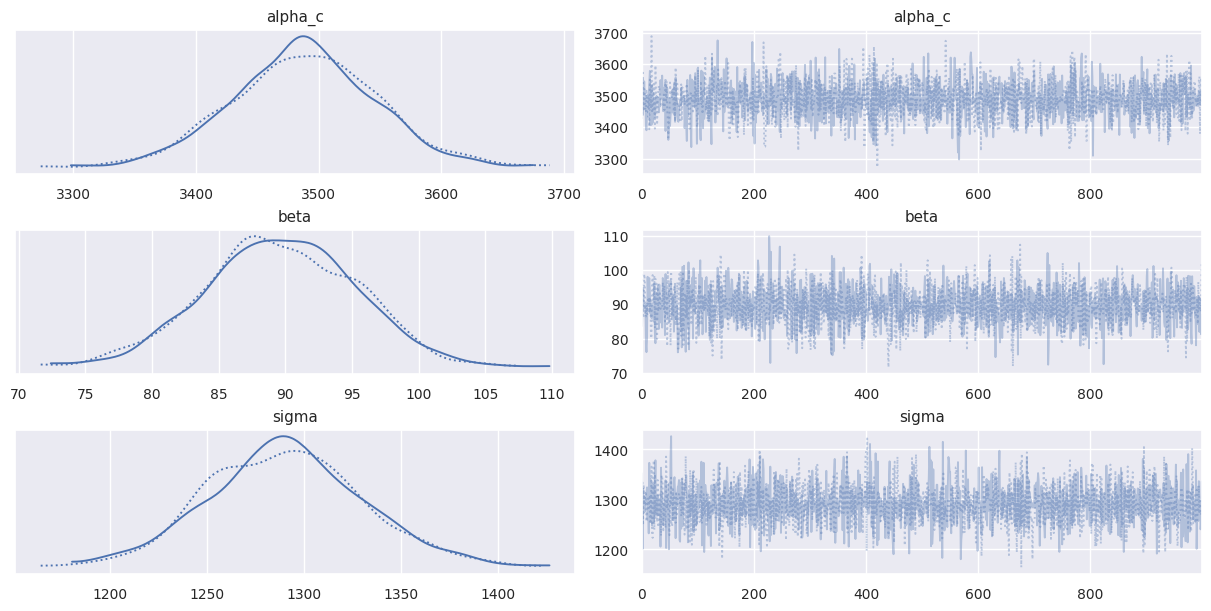

In [56]:
# Without centered covariates, sampling is much worse
az.plot_trace(trace);

# Your turn: define a model of probabilistic regression


*    Ridership tends to decrease as humidity increases: for every one percentage point increase in humidity level, ridership tends to decrease by 10 rides, though the decrease could vary between 0 and 20.


*    On an average humidity day, there are typically around 5000 riders, the actual number varying between 1000 and 9000.


 *  Ridership is only weakly related to humidity. At any given humidity, ridership will tend to vary with a large standard deviation of 2000 rides.

# Priors and likelihood

# Priors

* We assume independence of the parameters.


* In any case, the  joint prior  of the parameters is thus the product of their marginal pdfs:

\begin{align}
f(\alpha,\beta,\sigma)=f(\alpha)f(\beta)f(\sigma)
\end{align}

# Likelihood  


* It is the probability of observing our data $\mathbf{y}$ given a specific value of the parameters $\alpha,\beta,\sigma$


* Assuming   independence of the observations, we multiply the normal density of each observation:

$$ f(\mathbf{y}|\alpha,\beta,\sigma)=∏_{i=1}^n N( y_i|  \alpha + \beta x_i, \sigma) $$

# Your turn

* Given $\alpha$=2, $\beta=10$, $\sigma$=1

* Consider the observations:

|$X$|$Y$|
|:---:|:---:|       
| 1 | 11 |
| 5 | 50 |


* Compute the likelihood.

# Posterior

The three-dimensional posterior distribution is computed as:

\begin{align}
\underbrace{
f ( (\alpha,\beta,\sigma)| \mathbf{y})  
}_{\text{posterior}}
\propto \text{prior} \cdot \text{likelihood} & =
f(\alpha)f(\beta)f(\sigma) \left[ ∏_i^n f(y_i|\alpha,\beta,\sigma) \right]
\end{align}

* That is, we shall evaluate  prior and  likelihood for each possible value of the parameters and eventually normalize the result. We did  this using Pymc.

# Visualizing the model

* After having sampled the posterior, we have many posterior samples of type  $<\alpha_s,\beta_s, \sigma_s>$ with $s= 1,2, ....4000$.

* For visualizing the model we ignore $\sigma$.

* Each sample  $<\alpha_s,\beta_s>$ yields a plausible line.

*  We can visualize the average line using the posterior mean of $\alpha_c$ and $\beta$:

\begin{align}
\hat{\alpha}_c & =  \frac{1}{S} \sum_s \alpha_{c_s} \\
\hat{\beta} & = \frac{1}{S} \sum_s \beta_s \\
\end{align}

* We are using the hat to denote the posterior means, obtained by averaring over  the samples of the trace.


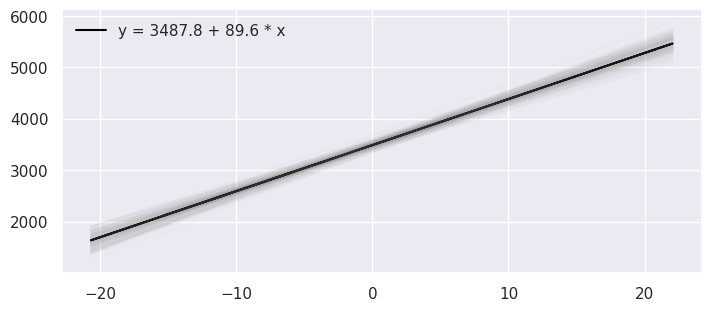

In [57]:
# extract the samples
idata = az.extract_dataset(trace)

#Mean regression line
alpha_c_mean =  idata.alpha_c.values.mean()
beta_mean   =  idata.beta.values.mean()
plt.plot(temperature_c, alpha_c_mean + beta_mean * temperature_c,
         c='black',label='y = {:.1f} + {:.1f} * x'.format(alpha_c_mean, beta_mean))
plt.legend();

#We plot the  other plausible lines
#using the sampled values of alpha_c and beta.
# This shows the uncertainty in the estimated parameters (epistemic uncertainty)
#To quickly compute the plot, we pick one sample every 10.

chosen_samples = range(0, len(idata.alpha_c.values),10)

#The uncertainty is shown by plotting a different line for each sample of (alpha_c, beta).
for i in range(len(chosen_samples)):
  plt.plot(temperature_c,  idata.alpha_c.values[i] + idata.beta.values[i] * temperature_c, c='gray', alpha=0.01)



# Discussion

* If we would do least squares linear regression, the line would pass through ($\bar{x_c}, \bar{y} = 0, \bar{y}$)

* Doing Bayesian regression the lines do not pass exactly in that point as they are affected by the prior.

* Nevertheless, the plausible lines are quite centered around  ($\bar{x_c}, \bar{y} = 0, \bar{y}$).

#  Evaluating the  association between $X$ and $Y$

* In our visual examination of the plausible linear models, all showed positive slope.

* Indeed, there is large posterior probability of $\beta$>0:
    

In [58]:
#  Evaluating the positive association between $x$ and $y$
# the 95% HDI of $\beta$  is about 80-100 and  contains only positive values.
# We reject the hypothesis of beta being 0.
az.summary(trace, var_names="beta")

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta,89.59,5.617,79.559,100.271,0.106,0.13,2786.0,1505.0,1.0


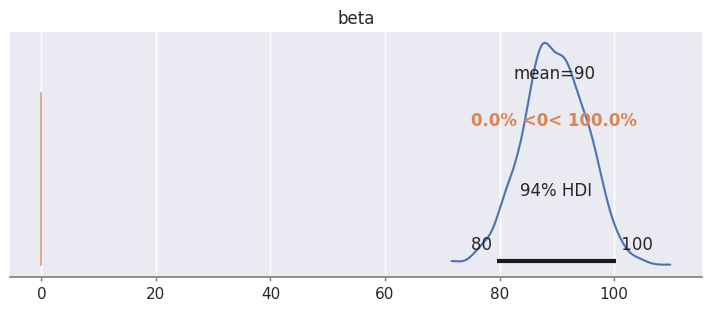

In [59]:
az.plot_posterior(trace, var_names="beta", ref_val=0);

# Making predictions


*  Predict the number of rides  for the a temperature of 66 F.


* First, we center the value: $x_c = 66 - \bar{x} = 66 - 63.3 = 2.7$

# Making predictions

A probabilistic prediction accounts for:

   * the *epistemic* uncertainty about the value of the  parameters
   * the *aleatory* uncertainty due to effect of the noise $\epsilon$
   

# Posterior predictive distribution

We loop on the rows of the trace.
At the row $s$ of the trace we make a prediction using parameter $<\alpha_s, \beta_s, \sigma_s>$:

$$y_{_{\text{pred},s}} \sim N(\alpha_{s} + \beta_s \cdot 2.7,  \sigma_s)$$

$$
\left[
\begin{array}{lll}
\alpha_{c,1} & \beta_1 & \sigma_1 \\
\alpha_{c,2} & \beta_2 & \sigma_2 \\
\vdots & \vdots & \vdots \\
\alpha_{c,4000} & \beta_{4000} & \sigma_{4000} \\
\end{array}
\right]
\;\; \longrightarrow \;\;
\left[
\begin{array}{l}
y_{\text{pred},1} \\
y_{\text{pred},2} \\
\vdots \\
y_{\text{pred},4000} \\
\end{array}
\right]
$$


# Traditional vs Bayesian estimation


* Traditional least squares regression: you consider  only a single  parameter estimate, ignoring other plausible models.

* In the Bayesian approach, we consider all the plausible models represented in the posterior samples.

# Quantifying epistemic uncertainty and aleatory uncertainty

$$ \sigma^2_{\text{predictive}} = \sigma^2_{\text{epistemic}} +  \sigma^2_{\text{aleatory}}$$

* $ \sigma^2_{\text{pred}}$: variance of the predictive distribution, computed as in the previous slide.

* $ \sigma^2_{\text{epistemic}}$: variance of the expected value $\hat{\mu}$, without accouting  for $\sigma$:

$$
\\
\left[
\begin{array}{ll}
\alpha_{c,1} + x \beta_1  \\
\alpha_{c,2} + x \beta_2  \\
\vdots & \vdots  \\
\alpha_{c,4000} + x \beta_{4000} \\
\end{array}
\right]
\;\; = \;\;
\left[
\begin{array}{l}
\hat{\mu}_{1} \\
\hat{\mu}_{2} \\
\vdots \\
\hat{\mu}_{4000} \\
\end{array}
\right]
\\
$$

* The variance of the left-hand side is $\sigma^2_{\text{epistemic}}$, the variance of the right-hand side is $\sigma^2_{\text{pred}}$.

* We obtain $\sigma^2_{\text{aleatory}}$ as:   
$$ \sigma^2_{\text{aleatory}} = \sigma^2_{\text{pred}} - \sigma^2_{\text{epistemic}}$$

In [60]:
#centered value of x_test
x_test = 2.7

post = az.extract_dataset(trace)

#samples of the different variables. The vector of samples are shown with the underscore _s
sigma_s = post.sigma.values
alpha_s = post.alpha_c.values
beta_s  = post.beta.values

y_test = np.zeros(shape=len(sigma_s))

#predictive distribution
preds  = np.random.normal (loc = alpha_s + beta_s * x_test, scale = sigma_s)

#epistemic uncertainty, i.e., variance of the expected value
mu_hat  =  alpha_s + beta_s * x_test
epistemic_var = np.var (mu_hat)
aleatory_var =  np.var(preds) - epistemic_var

print("aleatory var: " + str (np.round(aleatory_var,0) ) + "\n" + "epistemic var: " + str( np.round(epistemic_var,0)))



aleatory var: 1702492.0
epistemic var: 3516.0


## Discussion

* The aleatory uncertainty is much larger than epistemic uncertainty.

* Collecting further samples will not reduce much the uncertainty.

* To reduce uncertainty, we better add further covariates (e.g., weekend vs weekday) which provide information currenly missing in our minimal model, in order to reduce $\sigma$ and thus the aleatory uncertainty.

* Try to add the weekend covariate and see how the uncertainty of the model changes.

# How to set the priors if background information is not available

* Sometimes no background information is available.


* We use in this case default priors which are based on the scale of the data. These priors are broad  and provides  information about the order of magnitude of the variables.


* See for https://cran.r-project.org/web/packages/rstanarm/vignettes/priors.html for more details.


# Default priors in case of no background knowledge

* These priors are broad, but nevertheless informativa about the order of magnitude of the parameter.


*  $\alpha_c \sim N(\bar{y}, 2 s_y )$:
    * we expect $\alpha_c$  to be close to  $\bar{y}$, yet we allow large variability around it (while remaining in the same scale of the data)
    * $\bar{y}$ are the  mean and  the standard deviation of  $Y$ in the sample.
    

* $\beta \sim N(0, 2.5 \frac{s_y}{s_x})$
    * a priori the relation has equal probability of being increasing or decreasing; hence the prior mean is 0;
    * the prior is broad since in simple linear regression  $\hat{\beta} = R \frac{s_y}{s_x}$, where $-1 < R < 1$ is the correlation between $X$ and $Y$.


*  $\sigma \sim HN (1.5 s_y)$. The prior for $\sigma$ is large compared to the standard deviation of the data, though remaining on the same scale.





# Robust linear regression


* Gaussianity of the errors is often a reasonable approximation but it  fails  in the presence of outliers.


* The Student's t-distribution provides  robust inference in presence of outliers.


* This  idea can be applied also to linear regression.


# Case study

* The data are perfectly aligned apart from an outlier.

* This is third example of the  Anscombe quartet, which contains some peculiar X-Y data sets  (https://en.wikipedia.org/wiki/Anscombe%27s_quartet)


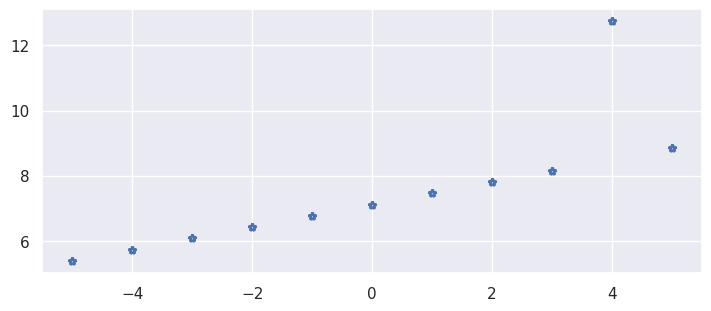

In [82]:
x  = np.array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.])
y  = np.array([ 7.46,  6.77, 12.74,  7.11,  7.81,  8.84,  6.08,  5.39,  8.15, 6.42,  5.73])

#we  center X
x_c = (x - x.mean())
plt.plot(x_c, y, '*');

# Models

* We will use
  * default priors with Gaussian likelihood
  * default priors with Student likelihood.

In [62]:
#used later for centering and for setting the default priors
s_x = x_c.std()
s_y = y.std()
y_bar = y.mean()

with pm.Model() as gaussian_model:
    #priors on intercept, slope and standard deviation of noise for standardized data
    alpha   = pm.Normal ('alpha', mu=y_bar, sigma=2 * s_y)
    beta    = pm.Normal ('beta',  mu=0,  sigma= 2.5 * s_y / s_x)
    sigma   = pm.HalfNormal ('sigma', sigma= 1.5 * s_y)

    y_pred   = pm.Normal ('y_pred', mu= alpha + beta * x_c,  sigma=sigma, observed=y)

    #the kwargs is needed to store the log_likelihood associated to each sample. Will be used later for a statistical
    #comaprison between the two models
    gaussian_trace   = pm.sample(idata_kwargs={"log_likelihood": True})

Output()

In [63]:
with pm.Model() as st_model:
    #notice the use of weakly, data-dependent prior for *standardized* data
    # st stands for Student
    alpha_st   = pm.Normal ('alpha_st', mu=y_bar, sigma=2 * s_y)
    beta_st    = pm.Normal ('beta_st',   mu=0,  sigma=2.5 * s_y / s_x)
    sigma_st   = pm.HalfNormal ('sigma_st', sigma= s_y)
    y_pred_st  = pm.StudentT  ('y_pred_st', mu= alpha_st + beta_st * x_c,  sigma=sigma_st,  nu=4, observed=y)
    st_trace   = pm.sample(idata_kwargs={"log_likelihood": True})

Output()

In [71]:
#The estimated of the Gaussian model have much larger uncertainty, because of the outlier
pd.concat( [az.summary(gaussian_trace), az.summary(st_trace)])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,7.517,0.426,6.702,8.309,0.012,0.013,1216.0,947.0,1.0
beta,0.497,0.136,0.240,0.754,0.003,0.004,1732.0,1216.0,1.0
sigma,1.405,0.395,0.847,2.155,0.012,0.017,1230.0,1023.0,1.0
alpha_st,7.114,0.002,7.110,7.119,0.000,0.000,1282.0,696.0,1.0
beta_st,0.345,0.001,0.344,0.347,0.000,0.000,930.0,695.0,1.0
sigma_st,0.007,0.004,0.002,0.014,0.000,0.000,655.0,761.0,1.0


# Visualizing the models

In [84]:
# For simplicity, we compare the two models  using only  the mean estimate of the parameters.
#By using all plausible values, we would see a large uncertainty for the Gaussian model.

#posterior mean of the parameters, robust model
post_st    = az.extract_dataset(st_trace)
a_st       = post_st.alpha_st.values.mean()
b_st       = post_st.beta_st.values.mean()

#posterior mean of the parameters, gaussian model
post_gauss  = az.extract_dataset(gaussian_trace)
a           = post_gauss.alpha.values.mean()
b           = post_gauss.beta.values.mean()

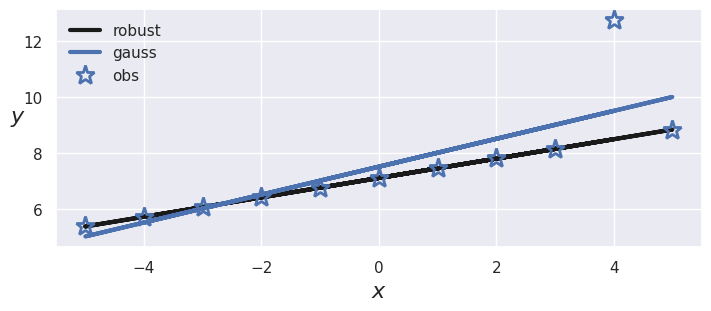

In [86]:
#The Student has correctly identified the line
plt.plot(x_c, a_st + b_st * x_c,  c='k', lw=3, label='robust')
plt.plot(x_c,  a+ b * x_c,  c='b', lw=3, label='gauss')
plt.plot(x_c, y, '*', markersize=14, label='obs')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', rotation=0, fontsize=16)
plt.legend();

In [87]:
# we can also compare the models via WAIC, which we will discuss later in the course.
# For the moment, consider it as a way to rank models based on how well they fit the data.
# the highest-ranked model is the supposedly best, i.e., the one whose probabilistic predictions
# are better. See the notebook on model selection for more details.

# the Student model is ranked first
compare_dict = {'gaussian':gaussian_trace, 'student': st_trace};
az.compare(compare_dict, ic='waic')

/usr/local/lib/python3.12/dist-packages/arviz/stats/stats.py:1667: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/arviz/stats/stats.py:1667: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


,rank,elpd_waic,p_waic,elpd_diff,weight,se,dse,warning,scale
student,0,11.074194,6.058284,0.000000,0.90863,28.786791,0.000000,True,log
gaussian,1,-21.517470,4.333060,32.591664,0.09137,5.130907,23.696616,True,log


# Discussion

* The model with the Gaussian likelihood is affected by the outlier.


* The robust model automatically discards the outlier and fits the correct line.


* The Student's t-distribution, due to its heavier tails, is able to give less importance to points that are far away from the bulk of the data, filtering outliers in an automatic way.

# Your turn

* Visualize the epistemic uncertainty of the gaussian and the student model

# Solutions

# A model of bike rides as a function of humidity


# Prior for the $\beta$ and $\alpha_c$


> For every one percentage point increase in humidity level, ridership tends to decrease by 10 rides, though the decrease could vary between 0 and 20.


$$ \beta  \sim N(-10, 5^2)  $$


>   On an average humidity day, there are typically around 5000 riders, the actual number varying between 1000 and 9000.

$$\alpha_c \sim N(5000, 2000^2)$$


# Prior for $\sigma$

> Ridership is only weakly related to humidity. At any given humidity, ridership will tend to vary with a large standard deviation of 2000 rides.

* We can  set:

$$ \sigma  \sim \text{HalfNormal} (3000), $$
whose  median is around 2000.

In [68]:
#obtained by trial and error
from scipy.stats import halfnorm
pd.DataFrame(halfnorm.rvs(scale=3000, size=10000)).describe()


,0
count,10000.000000
mean,2395.307529
std,1798.324358
min,0.118081
25%,969.395042
50%,2045.735244
75%,3451.942839
max,11478.191605


# The  model : regression of bike rides on humidity


\begin{align*}
\alpha_c & \sim  N (5000, 2000) \\
\beta & \sim N(-10, 5) \\
\sigma & \sim \text{HalfNormal} (3000)\\
Y & \sim N( \alpha_c + \beta X_c, \sigma)
\end{align*}

# Likelihood exercise

In [69]:
from scipy.stats import norm

x = np.array([1,5])
y = np.array([11,50])
beta = 10
alpha = 2
sigma = 1

#vector
mu = alpha + beta * x

#lik of each observation
#syntax: norm.pdf(value whose lik is to be computed, mean, standard deviation)
lik_vector = norm.pdf(y, mu, sigma)

#likelihood for both data points
lik = np.prod(lik_vector)

#to have a numerically stable approach, usually the log-likelihood is considered rather than the likelihood.
print(lik_vector)
print(lik)

[0.24197072 0.05399097]
0.013064233284684923


# Visualizing the epistemic uncertainty of the Student model


ValueError: x and y must have same first dimension, but have shapes (11,) and (2,)

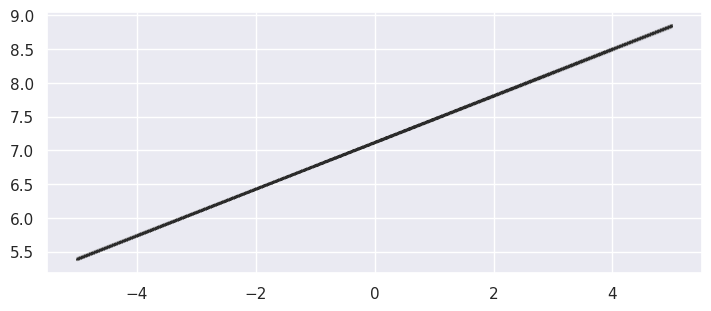

In [70]:
post_st    = az.extract_dataset(st_trace)
a_st_hat   = post_st.alpha_st.values.mean()
b_st_hat   = post_st.beta_st.values.mean()
a_st       = post_st.alpha_st.values
b_st       = post_st.beta_st.values

samples = len(post_st.alpha_st.values)

#mean pars
plt.plot(x_c,  a_st_hat + b_st_hat * x_c, c='black')

#The uncertainty is shown by plotting a different line for each sample of (alpha_c, beta).
#In this case, there is almost no epistemic uncertainty: the lines mostly overlap.
for i in range(samples):
    plt.plot(x_c,  a_st[i] + b_st[i] * x_c, c='gray', alpha=0.01)

plt.plot(x_c, y, '*', markersize=14, label='obs')

# Visualizing the epistemic uncertainty of the normal model

In [ ]:
#posterior mean of the parameters, gaussian model
post_gauss     = az.extract_dataset(gaussian_trace)
a_normal_hat   = post_gauss.alpha.values.mean()
b_normal_hat   = post_gauss.beta.values.mean()

#trace
a_normal       = post_gauss.alpha.values
b_normal       = post_gauss.beta.values

#here we plot a line for each sample. If you want to speed up plotting, select randomly e.g. 1/3 of them
plt.plot(x_c,  a_normal_hat + b_normal_hat * x_c, c='black')

# The uncertainty is shown by plotting a different line for each sample of (alpha_c, beta).
# There is a lot of epistemic uncertainty in this case
for i in range(samples):
    plt.plot(x_c,  a_normal[i] + b_normal[i] * x_c, c='gray', alpha=0.01)

plt.plot(x_c, y, '*', markersize=14, label='obs')